In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler


In [2]:
%cd ..

/home/jan/misc/copenhagen-hack/optimal-ph/aux/model-playground


In [3]:
frequencies = pd.read_csv("data/1-mers.tsv", sep="\t")
frequencies

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.069395,0.008897,0.081851,0.055160,0.039146,0.083630,0.014235,0.062278,0.087189,0.072954,0.024911,0.069395,0.039146,0.017794,0.019573,0.058719,0.072954,0.042705,0.012456,0.067616
1,0.100739,0.003358,0.069174,0.046340,0.034923,0.089993,0.006716,0.040967,0.076561,0.058428,0.014103,0.061115,0.030893,0.024849,0.022834,0.069174,0.101410,0.083949,0.016790,0.047683
2,0.090598,0.008547,0.046154,0.015385,0.034188,0.099145,0.006838,0.058120,0.047863,0.068376,0.018803,0.061538,0.061538,0.022222,0.013675,0.102564,0.114530,0.059829,0.013675,0.056410
3,0.102216,0.000715,0.064332,0.038599,0.027162,0.071480,0.010007,0.060043,0.064332,0.075768,0.010722,0.054325,0.068620,0.018585,0.012866,0.105790,0.090064,0.075054,0.001430,0.047891
4,0.117509,0.008226,0.059929,0.023502,0.024677,0.088132,0.015276,0.041128,0.041128,0.057579,0.023502,0.070505,0.034078,0.029377,0.025852,0.108108,0.089307,0.065805,0.024677,0.051704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104996,0.125954,0.007634,0.061069,0.022901,0.061069,0.099237,0.019084,0.030534,0.034351,0.068702,0.026718,0.030534,0.053435,0.019084,0.099237,0.091603,0.053435,0.038168,0.019084,0.038168
104997,0.140044,0.000000,0.061269,0.070022,0.028446,0.089716,0.013129,0.037199,0.006565,0.096280,0.017505,0.008753,0.070022,0.021882,0.098468,0.045952,0.070022,0.098468,0.010941,0.015317
104998,0.086253,0.000000,0.075472,0.061995,0.035040,0.110512,0.013477,0.067385,0.032345,0.075472,0.024259,0.026954,0.059299,0.029650,0.043127,0.075472,0.078167,0.097035,0.002695,0.005391
104999,0.146667,0.015238,0.076190,0.043810,0.032381,0.102857,0.030476,0.064762,0.026667,0.074286,0.034286,0.030476,0.066667,0.038095,0.059048,0.041905,0.040000,0.051429,0.001905,0.022857


In [4]:
train_meta = pd.read_csv("../train.csv", index_col=0)
valid_meta = pd.read_csv("../valid.csv", index_col=0)
train_meta

,mean_growth_PH,sequence,representative,is7
99973,7.40,MEANHGMNNYIKLAFVFGITTMATSYADTVAPPTLLTAQKLPQLQQ...,True,False
84793,7.00,MEFFKKTALAALVMGFSGAALALPNITILATGGTIAGGGDSATKSN...,False,True
27864,6.50,MSPLGILRRHRVAALLGAALIISPVVVSFAQSANSTGVSKIVATTQ...,True,False
46228,7.80,MKKQYWYVIITYVAMQLSSLVGVPLLAHSGFINASNKDIAISIASG...,False,False
6028,7.00,MSKKKMAITLSAMLSATIIPSFTMDVHAEKKEETKNTKIELENGMT...,False,True
...,...,...,...,...
69002,7.00,MEIIMRNLCFLLTLVATLLLHGRLIAAALPQDEKLITGQLDNGLRY...,False,True
75674,7.00,MSKHPKLLVLALACLACAGRASAAPASDEVARLAQRCAPDVSPLTM...,False,True
50377,7.45,MSRAGSLMLVLGTALWLCGCSGMNSENKRVAPVAEKRPHTMSLHGV...,True,False
87875,7.00,MSAGRLNKKSLGIVMLLSVGLLLAGCSGSKSSDTGTYSGSVYTVKR...,False,True


In [13]:
phychem = pd.read_csv("../../data/physchem/properties.csv", index_col=0).drop("ID", axis=1).reset_index(drop=True)
phychem

,isoelectricity,length,hydrophobicity,weight,aliphatic
0,4.860335,562,-0.510676,62824.47114,72.064057
1,5.032207,1489,-0.343586,160513.00714,73.183345
2,7.378459,585,-0.076068,61639.23834,75.743590
3,4.722769,1399,-0.150322,147316.17644,84.953538
4,5.476988,851,-0.269330,90706.29954,69.330200
...,...,...,...,...,...
104996,10.461661,262,-0.385496,28757.43674,62.366412
104997,4.959857,457,-0.029103,48805.45654,94.617068
104998,4.262404,371,-0.009164,38776.69354,92.479784
104999,5.295376,525,-0.120381,55572.00124,83.809524


In [9]:
phch_corr = pd.read_csv("../../data/physchem/correlationsprot.csv", index_col=0)
phch_corr

,prop_name,correlation
1,isoelectricity,-0.046261
2,length,0.009928
3,hydrophobicity,0.020644
4,weight,0.012079
5,aliphatic,0.086304


In [20]:
features = pd.concat([frequencies, phychem], axis=1)
features

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,isoelectricity,length,hydrophobicity,weight,aliphatic
0,0.069395,0.008897,0.081851,0.055160,0.039146,0.083630,0.014235,0.062278,0.087189,0.072954,...,0.058719,0.072954,0.042705,0.012456,0.067616,4.860335,562,-0.510676,62824.47114,72.064057
1,0.100739,0.003358,0.069174,0.046340,0.034923,0.089993,0.006716,0.040967,0.076561,0.058428,...,0.069174,0.101410,0.083949,0.016790,0.047683,5.032207,1489,-0.343586,160513.00714,73.183345
2,0.090598,0.008547,0.046154,0.015385,0.034188,0.099145,0.006838,0.058120,0.047863,0.068376,...,0.102564,0.114530,0.059829,0.013675,0.056410,7.378459,585,-0.076068,61639.23834,75.743590
3,0.102216,0.000715,0.064332,0.038599,0.027162,0.071480,0.010007,0.060043,0.064332,0.075768,...,0.105790,0.090064,0.075054,0.001430,0.047891,4.722769,1399,-0.150322,147316.17644,84.953538
4,0.117509,0.008226,0.059929,0.023502,0.024677,0.088132,0.015276,0.041128,0.041128,0.057579,...,0.108108,0.089307,0.065805,0.024677,0.051704,5.476988,851,-0.269330,90706.29954,69.330200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104996,0.125954,0.007634,0.061069,0.022901,0.061069,0.099237,0.019084,0.030534,0.034351,0.068702,...,0.091603,0.053435,0.038168,0.019084,0.038168,10.461661,262,-0.385496,28757.43674,62.366412
104997,0.140044,0.000000,0.061269,0.070022,0.028446,0.089716,0.013129,0.037199,0.006565,0.096280,...,0.045952,0.070022,0.098468,0.010941,0.015317,4.959857,457,-0.029103,48805.45654,94.617068
104998,0.086253,0.000000,0.075472,0.061995,0.035040,0.110512,0.013477,0.067385,0.032345,0.075472,...,0.075472,0.078167,0.097035,0.002695,0.005391,4.262404,371,-0.009164,38776.69354,92.479784
104999,0.146667,0.015238,0.076190,0.043810,0.032381,0.102857,0.030476,0.064762,0.026667,0.074286,...,0.041905,0.040000,0.051429,0.001905,0.022857,5.295376,525,-0.120381,55572.00124,83.809524


In [27]:
def get_xy(metadata, features, only_repr = False, only_not7 = False):
    if only_repr:
        metadata = metadata[metadata.representative]
    if only_not7:
        metadata = metadata[~metadata.is7]
    
    y = metadata.mean_growth_PH.to_numpy()
    X = features.loc[metadata.index].to_numpy()
    return X, y

X_train, y_train = get_xy(train_meta, features, only_not7=True)
X_valid, y_valid = get_xy(valid_meta, features, only_not7=True)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

In [22]:
X_train.shape, y_train.shape

((28168, 25), (28168,))

In [23]:
X_valid.shape, y_valid.shape

((7042, 25), (7042,))

In [29]:
X_train.mean(axis=0)

array([ 2.44684200e-17,  7.97115537e-17, -1.04179974e-16, -3.36819152e-16,
       -3.08756145e-16, -4.05873069e-16, -1.37224953e-16, -4.42071196e-17,
        1.11495274e-16, -2.94125543e-16, -1.92341961e-16,  4.19368538e-17,
       -8.87926168e-17, -1.33693429e-16,  2.15549122e-16, -1.73044702e-16,
       -2.82521963e-17,  3.51638943e-16, -1.19062827e-16, -2.05206800e-16,
       -3.96035251e-17, -8.86664909e-17,  3.36756089e-17, -1.11999778e-16,
        4.55692790e-16])

In [30]:
X_valid.mean(axis=0)

array([-0.02228469, -0.00638669,  0.03437065, -0.00079986,  0.01051792,
       -0.01050273, -0.01775468,  0.01954152,  0.01657033, -0.02366211,
       -0.01354148,  0.01827182, -0.01595097, -0.02649103, -0.02144099,
        0.01321897,  0.02143987, -0.01640401,  0.03101111,  0.02247052,
       -0.01616533,  0.01912468, -0.0170402 ,  0.0202578 , -0.01688576])

In [31]:
X_train_repr, y_train_repr = get_xy(train_meta, features, only_not7=True, only_repr=True)
X_valid_repr, y_valid_repr = get_xy(valid_meta, features, only_not7=True, only_repr=True)

X_train_repr = scaler.transform(X_train_repr)
X_valid_repr = scaler.transform(X_valid_repr)

X_train_repr.shape, X_valid_repr.shape

((14209, 25), (3552, 25))

In [32]:
models = [
    ("Ridge a0.5", Ridge(alpha=0.5, random_state = 31415)),
    ("Ridge a1", Ridge(alpha=1.0, random_state = 31415)),
    ("Ridge a2", Ridge(alpha=2.0, random_state = 31415)),
    ("RandomForest d2", RandomForestRegressor(max_depth=2, random_state=31415)),
    ("RandomForest d3", RandomForestRegressor(max_depth=3, random_state=31415)),
    ("RandomForest d4", RandomForestRegressor(max_depth=4, random_state=31415)),

]

for name, model in models:
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_valid)
    valid_repr_pred = model.predict(X_valid_repr)


    print(">>", name)
    print("Train | Spearman {:.4f} RMSE {:.4f}".format(spearmanr(train_pred, y_train)[0], np.sqrt(mean_squared_error(train_pred, y_train))))
    print("Valid | Spearman {:.4f} RMSE {:.4f}".format(spearmanr(valid_pred, y_valid)[0], np.sqrt(mean_squared_error(valid_pred, y_valid))))
    print("ValRe | Spearman {:.4f} RMSE {:.4f}".format(spearmanr(valid_repr_pred, y_valid_repr)[0], np.sqrt(mean_squared_error(valid_repr_pred, y_valid_repr))))

>> Ridge a0.5
Train | Spearman 0.3044 RMSE 1.0207
Valid | Spearman 0.2869 RMSE 1.0074
ValRe | Spearman 0.3291 RMSE 1.1213
>> Ridge a1
Train | Spearman 0.3044 RMSE 1.0207
Valid | Spearman 0.2870 RMSE 1.0074
ValRe | Spearman 0.3291 RMSE 1.1213
>> Ridge a2
Train | Spearman 0.3044 RMSE 1.0207
Valid | Spearman 0.2870 RMSE 1.0074
ValRe | Spearman 0.3291 RMSE 1.1213
>> RandomForest d2
Train | Spearman 0.3006 RMSE 1.0352
Valid | Spearman 0.2929 RMSE 1.0211
ValRe | Spearman 0.3120 RMSE 1.1437
>> RandomForest d3
Train | Spearman 0.3242 RMSE 1.0115
Valid | Spearman 0.3163 RMSE 1.0005
ValRe | Spearman 0.3324 RMSE 1.1284
>> RandomForest d4
Train | Spearman 0.3601 RMSE 0.9874
Valid | Spearman 0.3473 RMSE 0.9810
ValRe | Spearman 0.3526 RMSE 1.1093


In [33]:
models = [
    ("SVR C0.1", SVR(C=0.1, epsilon=0.1)),
    ("SVR C1", SVR(C=1.0, epsilon=0.1)),
    ("SVR C10", SVR(C=10.0, epsilon=0.1)),
    ("SVR C100", SVR(C=100.0, epsilon=0.1)),
]

for name, model in models:
    model.fit(X_train_repr, y_train_repr)
    print("fit!")
    train_pred = model.predict(X_train_repr)
    valid_pred = model.predict(X_valid)
    valid_repr_pred = model.predict(X_valid_repr)

    print(">>", name)
    print("Train | Spearman {:.4f} RMSE {:.4f}".format(spearmanr(train_pred, y_train_repr)[0], np.sqrt(mean_squared_error(train_pred, y_train_repr))))
    print("Valid | Spearman {:.4f} RMSE {:.4f}".format(spearmanr(valid_pred, y_valid)[0], np.sqrt(mean_squared_error(valid_pred, y_valid))))
    print("ValRe | Spearman {:.4f} RMSE {:.4f}".format(spearmanr(valid_repr_pred, y_valid_repr)[0], np.sqrt(mean_squared_error(valid_repr_pred, y_valid_repr))))

fit!
>> SVR C0.1
Train | Spearman 0.5235 RMSE 1.0572
Valid | Spearman 0.4860 RMSE 0.9773
ValRe | Spearman 0.4915 RMSE 1.0701
fit!
>> SVR C1
Train | Spearman 0.6520 RMSE 0.9371
Valid | Spearman 0.5404 RMSE 0.9096
ValRe | Spearman 0.5194 RMSE 1.0228
fit!
>> SVR C10
Train | Spearman 0.8186 RMSE 0.7126
Valid | Spearman 0.5630 RMSE 0.8617
ValRe | Spearman 0.4882 RMSE 1.0232
fit!
>> SVR C100
Train | Spearman 0.9493 RMSE 0.3999
Valid | Spearman 0.5050 RMSE 0.9584
ValRe | Spearman 0.3887 RMSE 1.1885


In [39]:
preds = models[2][1].predict(X_valid)

<AxesSubplot:ylabel='Count'>

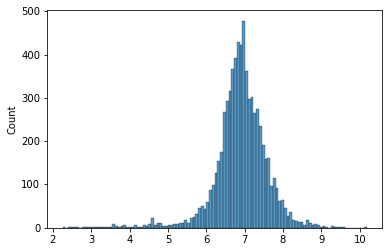

In [40]:
sns.histplot(preds)